<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [84]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols


#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [7]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [15]:
boston_df.shape


(506, 14)

In [17]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


For the "Median value of owner-occupied homes" (MEDV) provide a **boxplot**

Text(0, 21.2, '21.2')

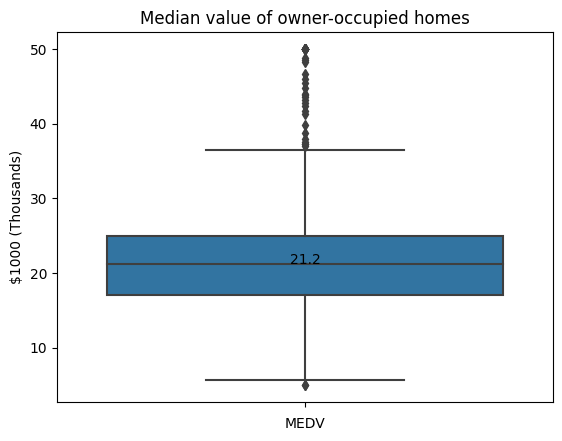

In [35]:
ax = sns.boxplot( y='MEDV', data=boston_df)
medians = boston_df['MEDV'].median()
pyplot.xlabel('MEDV')   # Label for the x-axis
pyplot.ylabel('$1000 (Thousands)')      # Label for the y-axis
pyplot.title('Median value of owner-occupied homes')  
pyplot.text(0,  medians, round(medians, 2), color='black', ha='center')

In [57]:
CHAS_1 = boston_df.groupby('CHAS')['CHAS'].count()
dict={'River Bound' : ['No', 'Yes'], 'Count' : [CHAS_1[0],CHAS_1[1]] }
Charles_river = pd.DataFrame(dict)
Charles_river

,River Bound,Count
0,No,471
1,Yes,35


Text(0.5, 1.0, 'Amount of houses that bound the Charles River')

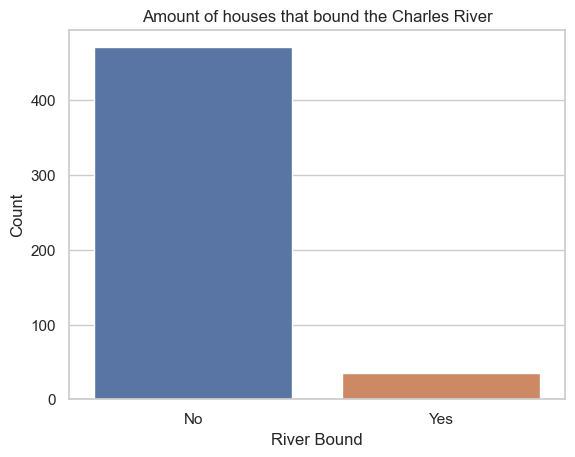

In [105]:
sns.set(style="whitegrid")

az = sns.barplot(x="River Bound", y="Count", data=Charles_river)
pyplot.title('Amount of houses that bound the Charles River')  

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [102]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'




Text(0.5, 1.0, 'Relation between "Proportion of owner-occupied units built prior to 1940" and Median value of owner-occupied homes')

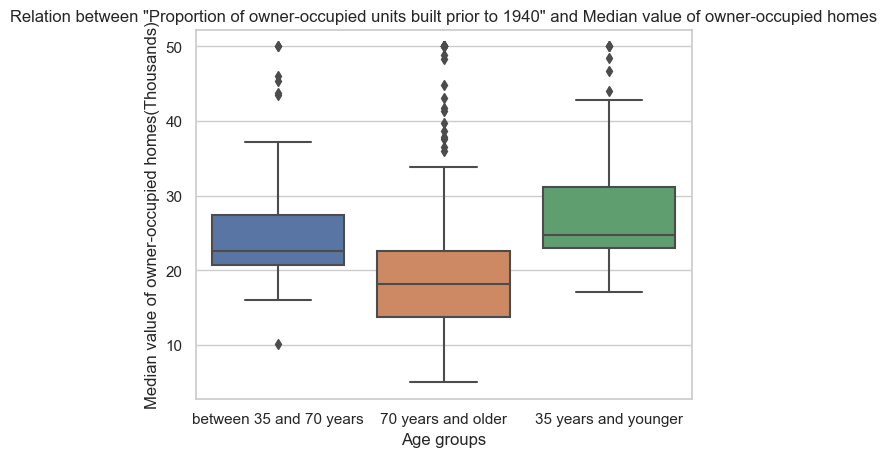

In [108]:
ax = sns.boxplot(x="age_group", y="MEDV", data=boston_df)
pyplot.xlabel('Age groups')   # Label for the x-axis
pyplot.ylabel('Median value of owner-occupied homes(Thousands)')      # Label for the y-axis
pyplot.title('Relation between "Proportion of owner-occupied units built prior to 1940" and Median value of owner-occupied homes')

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

There is an seeming correltarion between these variables


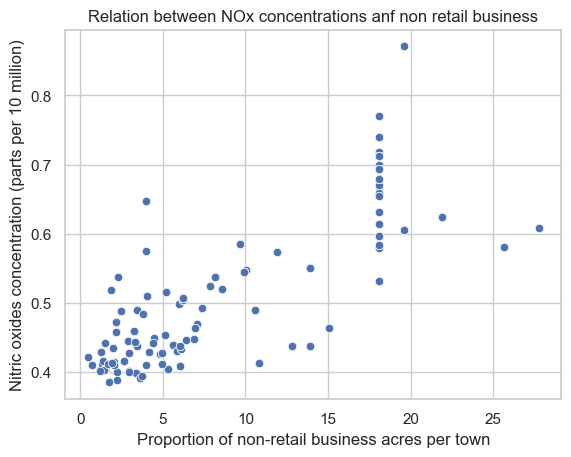

In [104]:
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
pyplot.xlabel('Proportion of non-retail business acres per town')   # Label for the x-axis
pyplot.ylabel('Nitric oxides concentration (parts per 10 million)')      # Label for the y-axis
pyplot.title('Relation between NOx concentrations anf non retail business')
print('There is an seeming correltarion between these variables'  )  

Create a histogram for the pupil to teacher ratio variable

Text(0.5, 1.0, 'Pupil to teacher ratio')

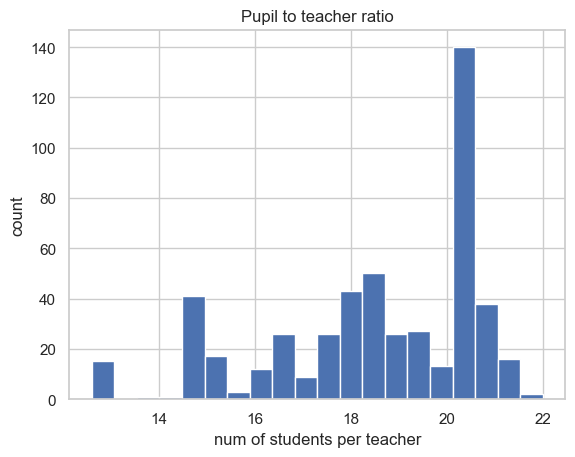

In [106]:
pyplot.hist(boston_df['PTRATIO'], bins=20)
pyplot.xlabel('num of students per teacher')
pyplot.ylabel('count')
pyplot.title('Pupil to teacher ratio') 

State the hypothesis
* $H_0: µ_1 = µ_2$ ("there is no difference in MEDV  between Charles river bound hauses and no river bound houses")
* $H_1: µ_1 ≠ µ_2$ ("there is a difference in MEDV  between Charles river bound hauses and no river bound houses")


In [91]:

# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

var_test= stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')
print(var_test)

# since the p-value is less than 0.05 we can assume inequality of variance

# H0 (Null) - the difference is NOT significant; H1 - the difference is significant; alpha = 0.05
medv_chas = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_no_chas = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_statistic, p_value = stats.ttest_ind(medv_chas, medv_no_chas, equal_var = False)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print('There is a significant difference in median value of houses bounded by the Charles river.')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)
T-statistic: 3.113291312794837
P-value: 0.003567170098137517
There is a significant difference in median value of houses bounded by the Charles river.


__Conclusion:There is a significant difference in median value of houses bounded by the Charles river.__

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
State the hypothesis
* $H_0: µ_1 = µ_2 = µ_3$ (the three population means are equal)
* $H_1:$ At least one of the means differ


In [93]:
MEDV_var = stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')
MEDV_var

# since the p-value is more than 0.05, the variance are equal


LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [95]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV'] 

In [96]:
f_statistic, p_value = stats.f_oneway(thirtyfive_lower , thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


__Conclusion Since the P value is greater than 0.05 we fail to reject the null hipotesis, there's not evidence to support that theres a difference in the  "Median value of owner-occupied homes" (in $1000's) means bbetween the "proportion of owner-occupied units built prior to 1940" groups__

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis:
* $H_0:$ Nitric oxide concentrations  is not correlated with proportion of non-retail business acres per town
* $H_1:$  Nitric oxide concentrations is correlated with proportion of non-retail business acres per town


In [99]:
stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209157, pvalue=7.91336106123623e-98)

__Conclusion: Since p-value is less than 0.05 we can reject the Null hipotesis, theres an estatistical correlation between NOX and INDUS values__

What is the impact of an additional weighted distance  to the five Boston employment centres (DIS) on the median value of owner occupied homes(MEDV)? (Regression analysis)

In [100]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           1.21e-08
Time:                        14:40:50   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Conclusion:According to the regresion analysis are a 5.795 impact from the additional weighted distand to the five Boston employement centres to the median value of owner occupied homes__

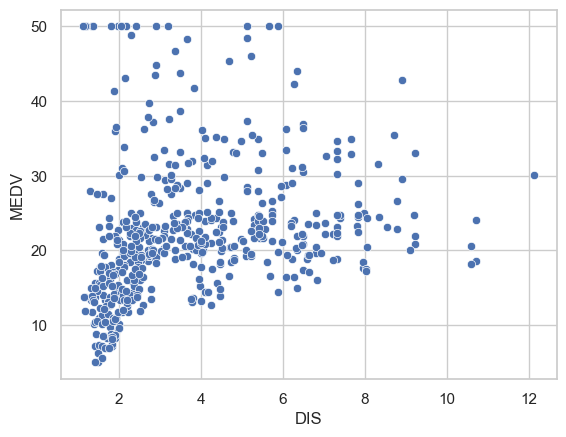

In [101]:
ax = sns.scatterplot(x='DIS', y='MEDV', data=boston_df)